In [1]:
from manim import *
import math
import numpy as np
from manim_slides import *

####
# Instructions for using manim-slides/manim in Jupyter and then how to render final product:
#1. Make a function in each scene callsed:
# DELAY = 0.1
# def pause(self):
#   self.wait(DELAY)
#   self.next_slide()
#2. Put self.pause() after every animation where you want to pause
#3. Decide to use either manim-slides or manim jupyter magic for the notebook:
# a. For manim-slides make each class MyScene(Slide) and then use:
#    %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true data_uri=false
#    Controls: Toggle Full Screen (F), Quit (Q), Play/Pause (Space), Next (Right), Previous (Left), Reverse (V), Replay (R), Hide/Show Mouse (H).
#    See all slides (Esc)
#    custom cli commands other than controls=false can be found at. https://manim-slides.eertmans.be/latest/reference/customize_html.html
# b. For regular manim video use class MyScene(Scene) and then use:
#    %%manim -ql -v CRITICAL MySlide
#    -ql means quality low, this is useful for faster rendering during development
#    Can also use: --progress_bar [display|leave|none] for the progress bar
#.   -v WARNING sets the verboisty level to "WARNING"
#.  Muse comment out #self.next_slide() in the pause function.
#4. Use self.next_section to skip animations (for faster rendering)
#   In regular manim (not slides)
#   Use:
#    self.next_section(skip_animations=True)
#    ...code you want to skip the animations for here...
#    self.next_section() 
#    ...code you are wokring on here...
#
# When ready to render do:
# 1. Comment out all the jupyter magic and all the next_section(skip_animations=True)
# 2. Save as all_scenes.py file with all the scenes
# 3. In terminal run:
# manim -qh all_scenes.py Scene1 Scene2 Scene3
# manim-slides present Scene1 Scene2 Scene3
#
# Manim juptyer magic commands:
# %%manim -ql -v WARNING MyScene
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true


/Users/mnica/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mnica/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [215]:
## Global Variables and Stuff ##
#config.media_embed = True
DELAY = 0.1

# latex preamble
texPre = TexTemplate()
texPre.add_to_preamble(r"""
    \usepackage{amsmath}
    \usepackage{amssymb}
    \newcommand{\E}{\mathbb{E}}
    \newcommand{\P}{\mathbb{P}}
    \newcommand{\vect}[1]{\mathbf{#1}}
""") 

# tex color dictionary
E_color = GREY_B
n_color = BLUE_C
T_color = ORANGE
F_color = PURPLE_A
t2cD = {
    r"\E": E_color,
    r"\mathbb{P}": E_color,
    r"\big(": E_color,
    r"\big)": E_color,
    "n ": n_color,
    "T ": T_color,
    "F_": F_color
}

# font sizes
my_fs = 75

In [123]:
def get_angle(mobject1, mobject2):
    # Get direction vectors of the two Mobjects
    delta_x = mobject2.get_x() - mobject1.get_x()
    delta_y = mobject2.get_y() - mobject1.get_y()

    # Calculate the angle between the two vectors
    return math.atan2(delta_y, delta_x)
    

In [3]:
## Global Variables to Store Final Mobjects Passed Between Scenes ##
FINAL_MOBJECTS = None

Manim Community v0.18.1

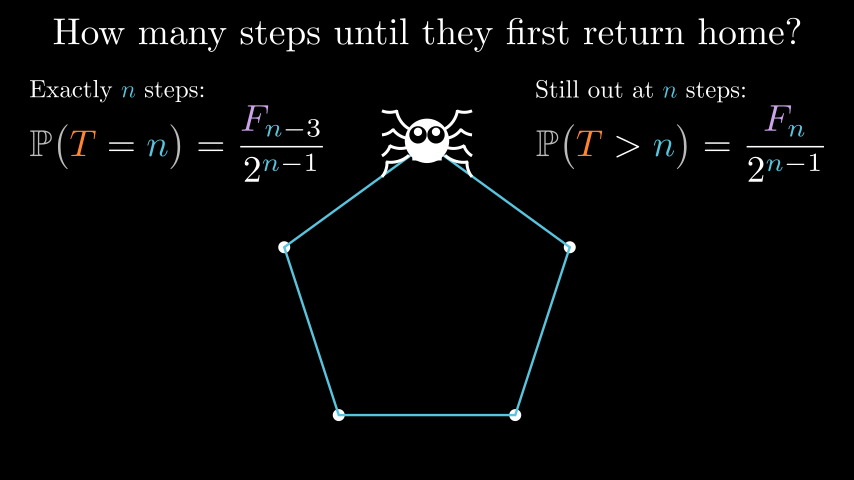

In [225]:
%%manim -ql -v WARNING Spider
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.

class Spider(Scene): # change to MyScene(Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    def construct(self):
        #self.next_section(skip_animations=True) #comment out for manim-slides
        #self.pause()
        
        ###
        #self.next_section() #comment out for manim-slied
        
        def my_house(x=0,y=0,scale=0.075):
            new_house = Polygon([0, 0, 0],  # Bottom-left base
                                [2.2, 0, 0],  # Bottom-left door
                                [2.2, 2.8, 0],  # Top-left door
                                [3.8, 2.8, 0],  # Top-right door
                                [3.8, 0, 0],  # Bottom-right door
                                [6, 0, 0],  # Bottom-right base
                                [6, 4, 0],  # Top-right base
                                [6.5, 4, 0],   # Rightmost corner roof
                                [3, 7, 0],     # Apex roof
                                [-0.5, 4, 0],  # Leftmost corner roof
                                [0, 4, 0],  # Top-left base
                               color=WHITE, fill_color=WHITE, fill_opacity=1.0)
            new_house.set_x(x)
            new_house.set_y(y)
            new_house.scale(scale)
            return new_house
        
        # Draw the spider's body
        def my_spider(eye_angle = 0.1, my_scale = 0.5):
            body = Circle(radius=0.7, color=WHITE, fill_opacity=1).shift(UP * 0.5)

            # Draw the spider's eyes
            eye1 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + LEFT * 0.3)
            eye2 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + RIGHT * 0.3)


            # Add eyeballs to the eyes

            #eye_angle = 0.1
            eye_x = np.cos(eye_angle)*0.1
            eye_y = np.sin(eye_angle)*0.1
            eyeball1 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + LEFT * 0.3)
            eyeball2 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + RIGHT * 0.3)
    
            # Draw the spider's legs
            legs = VGroup()

            # Define rotation and positions for each leg
            leg_positions = [
                (-1,-1.5, 1), (-1,-1.5, 0.2),  # Left front legs
                (-1,-1.5, -0.5), (-1,-1.5, -1.2), # Left back legs
                (1,1.5, 1), (1,1.5, 0.2),    # Right front legs
                (1,1.5, -0.5), (1,1.5, -1.2)  # Right back legs
            ]

            # Add legs with two segments to the group
            for rot, x, y in leg_positions:
                theta = rot*0.2 

                frac = 0.8
                joint = [(x*np.cos(theta)-y*np.sin(theta)) * frac, (x*np.sin(theta)+y*np.cos(theta)) * frac, 0]  # Position of the joint between segments

                my_origin = [x*0.4, y*0.4,0]
                
                leg_width = my_scale*10
                leg_segment1 = Line(start=my_origin, end=joint, color=WHITE, stroke_width=leg_width ,path_arc=rot*0.9)
                frac = 0.78
                joint = [(x*np.cos(theta)-y*np.sin(theta)) * frac, (x*np.sin(theta)+y*np.cos(theta)) * frac, 0]  # Position of the joint between segments

                leg_segment2 = Line(start=joint, end=[x, y, 0], color=WHITE, stroke_width=leg_width ,path_arc=rot*0.75)
                leg_segment1.shift(UP * 0.5)  # Align first segment with the body
                leg_segment2.shift(UP * 0.5)  # Align second segment with the body
                legs.add(leg_segment1, leg_segment2)

            # Add everything to the scene eyeball1, eyeball2,
            
            return VGroup( body, eye1, eye2, legs, eyeball1, eyeball2).scale(my_scale).set_z_index(2)
    
        
        
        pentagon = RegularPolygon(n=5).scale(2.5).shift(0.75*DOWN) #to_edge(RIGHT,buff=1.0)
        #self.add(pentagon)
        # Get the vertices of the polygon
        vertices = pentagon.get_vertices()

        # Add the polygon to the scene
        self.add(pentagon)

        # Mark the vertices
        dots = VGroup(*[Dot(point=vertex, color=WHITE, radius=0.1) for vertex in vertices])
        self.add(dots[1:])
        #house_size = 2.0 
        #house = VGroup( Polygon([house_size/2,0,0],[0,house_size/2,0],[-house_size/2,0,0])  )
        
        #house += Square(side_length=house[0].width*0.75).next_to(house[0],DOWN,buff=0.0)
        #self.add(house)
        
        #house.move_to(dots[0])

        # Optionally, add labels to the vertices
        for i, vertex in enumerate(vertices):
            label = Text(f"{i+1}").scale(0.5).next_to(vertex, UP * 0.2)
            #self.add(label)

        spider = my_spider(eye_angle = 90*DEGREES)
        
        spider.move_to(dots[0])
        self.add(spider)
        
        
        #home = MathTex(r"\text{HOME}",font_size=50)
        house = my_house()
        house.set_z_index(1)
        house.move_to(dots[0])
        self.add(house)
        #home.next_to(spider,UP)
        #self.add(home)
        
        q_size = 60
        eq_size = 60
        hint_size = 40
        line1 = MathTex(r'\text{A spider goes for a random walk on a pentagon.}',font_size=q_size)
        line2 = MathTex(r'\text{How many steps until they first return home?}',font_size=q_size)
        
        P_exact_hint = MathTex(r'\text{Exactly } n \text{ steps:}',
                        font_size=hint_size, tex_to_color_map=t2cD)
        P_exact = MathTex(r'\mathbb{P}\big(T = n \big) = { F_{ n - 3}', r' \over 2^{ n -1 } }',
                        font_size=eq_size, tex_to_color_map=t2cD) #,
                        #tex_template=texPre) #, tex_to_color_map=t2cD)
        P_g_hint = MathTex(r'\text{Still out at } n \text{ steps:}',
                        font_size=hint_size, tex_to_color_map=t2cD)
        P_g = MathTex(r'\mathbb{P}\big(T > n \big) = { F_{ n }', r' \over 2^{ n -1 } }',
                        font_size=eq_size, tex_to_color_map=t2cD)
        
        top_buff = 0.3
        line1.to_edge(UP,buff=top_buff)
        line2.to_edge(UP,buff=top_buff)
        #line2.align_to(line1,LEFT)
        
        P_exact.set_y(spider.get_y())
        P_exact.to_edge(LEFT)
        
        P_g.set_y(spider.get_y())
        P_g.to_edge(RIGHT)
        
        P_exact_hint.next_to(P_exact,UP,buff=0.05).align_to(P_exact,LEFT)
        P_g_hint.next_to(P_g,UP,buff=0.05).align_to(P_g,LEFT)
        
        
        self.add(line2,P_exact,P_exact_hint,P_g,P_g_hint,pentagon,spider)
        return 0
        
        self.play(Write(line1))
        
        
        spider_pos = 0
        spider_pos_post = 0
        for t in range(2):
            choice = np.random.choice([-1,+1])
            #left_step = ( spider_pos - 1 ) % 5
            #right_step = ( spider_pos + 1 ) % 5
            #spider_pos_post = np.random.choice([left_step,right_step])
            #while spider_pos_post == 0:
            #    spider_pos_post = ( spider_pos + np.random.choice([-1,1]) ) % 5
            
            
            
            print(spider_pos_post)
            
            look_length = 1.0
            look_num = 2
            for spider_target in [-1,+1]*look_num:
                spider_pos_post = ( spider_pos + choice*spider_target ) % 5
                spider.generate_target()
                spider.target = my_spider(eye_angle = get_angle(dots[spider_pos],dots[spider_pos_post]))

                spider.target.move_to(dots[spider_pos]) #move just the eyes!
                self.play(MoveToTarget(spider),run_time=look_length/(2.0*look_num))
                
            spider_pos_post = ( spider_pos + choice ) % 5
                
            spider.target.move_to(dots[spider_pos_post])
            anim_group = [MoveToTarget(spider)]
            if t==0:
                anim_group.append(LaggedStart(FadeOut(line1,shift=RIGHT),Write(line2),lag_ratio=0.5))
                #anim_group.append()
            self.play(anim_group)
            
            
            spider_pos = spider_pos_post
        

Manim Community v0.18.1

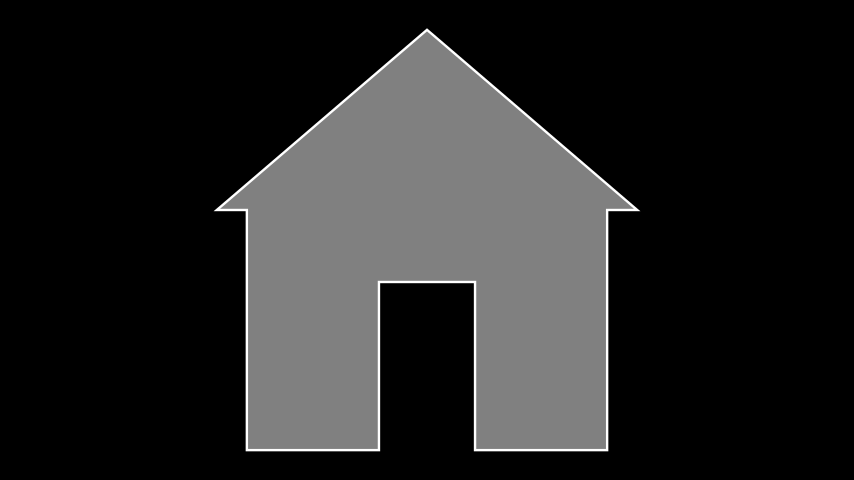

In [149]:
%%manim -ql -v WARNING House
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.

class House(Scene): # change to MyScene(Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    def construct(self):
        #self.next_section(skip_animations=True) #comment out for manim-slides
        #self.pause()
        
        # Base Rectangle
        base = Polygon(
            [0, 0, 0],  # Bottom-left
            [6, 0, 0],  # Bottom-right
            [6, 4, 0],  # Top-right
            [0, 4, 0],  # Top-left
            color=BLUE
        )

        # Door Rectangle
        door = Polygon(
            [2.2, 0, 0],  # Bottom-left
            [3.8, 0, 0],  # Bottom-right
            [3.8, 2.8, 0],  # Top-right
            [2.2, 2.8, 0],  # Top-left
            color=GREEN
        )

        # Roof Triangle
        roof = Polygon(
            [-0.5, 4, 0],  # Leftmost corner
            [6.5, 4, 0],   # Rightmost corner
            [3, 7, 0],     # Apex
            color=RED
        )

        # Add shapes to the scene
        house = VGroup(base,door,roof)
        
        def my_house(x=0,y=0,scale=0.5):
            new_house = Polygon([0, 0, 0],  # Bottom-left base
                                [2.2, 0, 0],  # Bottom-left door
                                [2.2, 2.8, 0],  # Top-left door
                                [3.8, 2.8, 0],  # Top-right door
                                [3.8, 0, 0],  # Bottom-right door
                                [6, 0, 0],  # Bottom-right base
                                [6, 4, 0],  # Top-right base
                                [6.5, 4, 0],   # Rightmost corner roof
                                [3, 7, 0],     # Apex roof
                                [-0.5, 4, 0],  # Leftmost corner roof
                                [0, 4, 0],  # Top-left base
                               color=WHITE, fill_color=WHITE, fill_opacity=0.5)
            new_house.set_x(x)
            new_house.set_y(y)
            new_house.scale(scale)
            return new_house
        
        house.move_to([0,0,0])
        new_house.move_to([0,0,0])
        self.add(new_house)

        